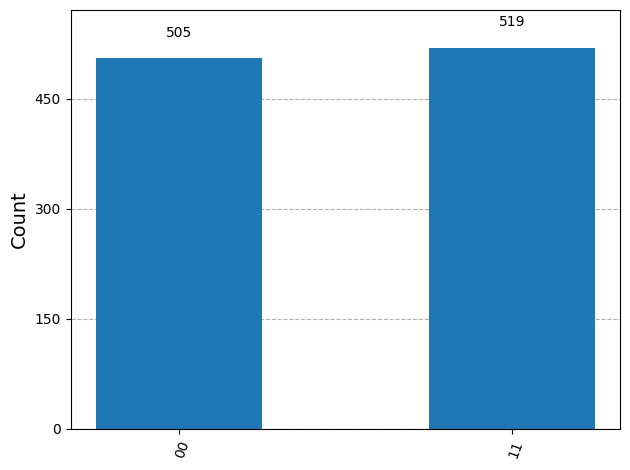

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Initialize the circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Add measurement to both qubits to bring the state to the classical bits
qc.measure([0,1], [0,1])

# Using the new 2025 Qiskit API for simulation
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Visualize the results
plot_histogram(counts)


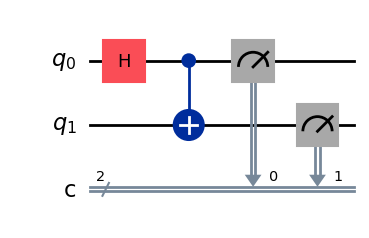

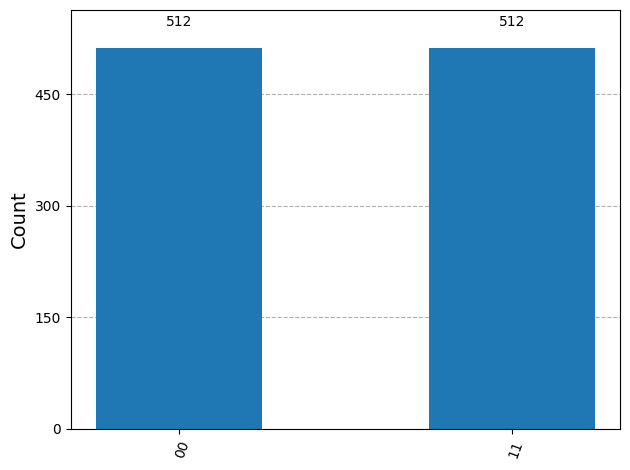

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Initialize the circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Add measurement to both qubits to bring the state to the classical bits
qc.measure([0, 1], [0, 1])

# Display the circuit
display(qc.draw('mpl'))

# Using the new 2025 Qiskit API for simulation
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Visualize the results
plot_histogram(counts)


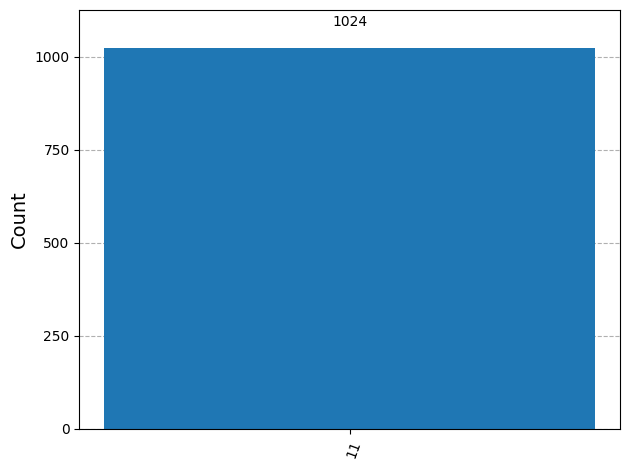

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZGate
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Oracle for the state |11>
def oracle(qc):
    qc.cz(0, 1)  # Apply CZ which flips the phase of the |11> state

# Grover diffusion operator for 2 qubits
def diffusion_operator(qc):
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)  # This implements a multi-controlled Z gate
    qc.h([0, 1])

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2, 2)

# Initialization
qc.h([0, 1])  # Put the qubits in superposition

# Apply Oracle
oracle(qc)

# Apply the Grover Diffusion Operator
diffusion_operator(qc)

# Measurement
qc.measure([0, 1], [0, 1])

# Simulate the Circuit
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Display results
plot_histogram(counts)


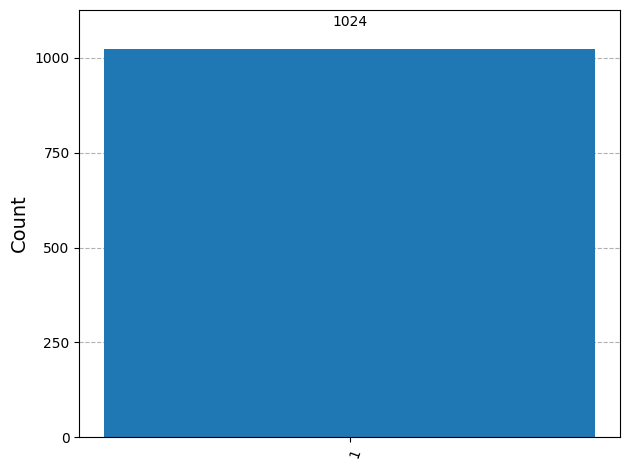

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Define a balanced oracle
# This example uses a 2-qubit system for simplicity.
# An example of a balanced oracle can be a CNOT with an additional X-gate on the target qubit.
def balanced_oracle(qc):
    # Assumes the first qubit is the input and the second is the output (ancilla, initialized to |1>)
    qc.cx(0, 1)
    # Apply additional gates to ensure balanced behavior, in this case, an X before and after the CNOT creates a balanced effect.
    qc.x(1)

# Set up the Deutsch-Jozsa circuit
n = 2  # Number of qubits including the ancilla
qc = QuantumCircuit(n, n - 1)  # We measure n-1 qubits; the ancilla qubit is not measured

# Apply Hadamard gates before the oracle
qc.h(0)  # Apply Hadamard to the input qubit
qc.x(1)  # Prepare the ancilla qubit in the |1> state
qc.h(1)  # And then apply Hadamard

# Apply the balanced oracle
balanced_oracle(qc)

# Apply Hadamard gates after the oracle
qc.h(0)
# No need to apply Hadamard to the ancilla qubit

# Measurement
qc.measure(0, 0)  # We're only interested in the input qubit's result

# Using the new 2025 Qiskit API for simulation
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc, shots=1024).result()
counts = result.get_counts()

# Visualize the results
plot_histogram(counts)


In [5]:
qc.draw()

┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐├───┤└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├─╫─
     └───┘└───┘└───┘└───┘ ║ 
c: 1/═════════════════════╩═
                          0

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator

# Step 1: Prepare a superposition state
num_qubits = 3  # Example with 3 qubits, adjust as needed
qc = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
for qubit in range(num_qubits):
    qc.h(qubit)

# Step 2: Apply a phase oracle (Example: Applying a phase of pi to all states)
for qubit in range(num_qubits):
    qc.p(3.14159, qubit)  # Applying a global phase of pi

# Step 3: Perform an inverse QFT
inverse_qft = QFT(num_qubits).inverse()
qc.append(inverse_qft, range(num_qubits))

# Display the circuit (optional)
print(qc.draw())

# Simulation
# Initialize the simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
transpiled_circuit = transpile(qc, simulator)

# Execute the circuit
result = simulator.run(transpiled_circuit, shots=1024).result()

# Get and print the result (counts)
counts = result.get_counts()
print(counts)

# If you wish to visualize the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)


/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_19011/623467636.py:18: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  inverse_qft = QFT(num_qubits).inverse()


     ┌───┐┌───────────┐┌───────┐
q_0: ┤ H ├┤ P(3.1416) ├┤0      ├
     ├───┤├───────────┤│       │
q_1: ┤ H ├┤ P(3.1416) ├┤1 IQFT ├
     ├───┤├───────────┤│       │
q_2: ┤ H ├┤ P(3.1416) ├┤2      ├
     └───┘└───────────┘└───────┘


QiskitError: 'No counts for experiment "0"'

/var/folders/k3/xf5hs7g94kg9b9n84jk35czh0000gn/T/ipykernel_19011/147953804.py:18: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  inverse_qft = QFT(num_qubits).inverse()


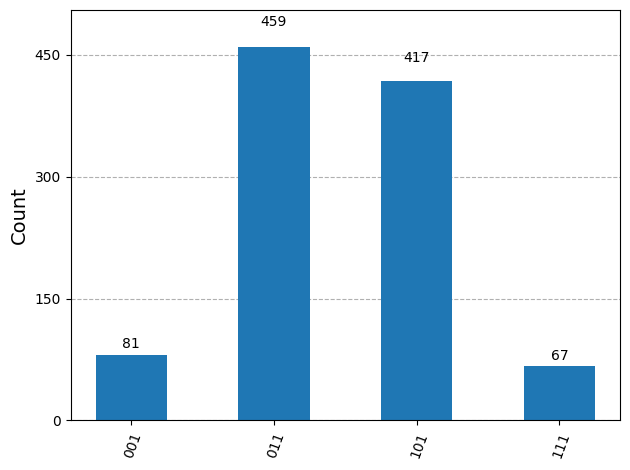

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

num_qubits = 3  # Example with 3 qubits
qc = QuantumCircuit(num_qubits, num_qubits)  # Note the addition for measurement bits

# Prepare a superposition state
for qubit in range(num_qubits):
    qc.h(qubit)

# Apply a phase oracle (example)
for qubit in range(num_qubits):
    qc.p(3.14159, qubit)  # Phase of pi for demonstration

# Perform an inverse QFT
inverse_qft = QFT(num_qubits).inverse()
qc.append(inverse_qft, range(num_qubits))

# Add measurements to retrieve counts
qc.measure(range(num_qubits), range(num_qubits))

# Simulation
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=1024).result()
counts = result.get_counts()  # This should now work as expected

# Visualize the results
plot_histogram(counts)


In [8]:
from qiskit import QuantumCircuit

# Given angles theta and phi for the Bloch Sphere vector
theta = 1.23  # Example value in radians
phi = 0.67    # Example value in radians

# Create a Quantum Circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply rotation around the Y-axis by theta
qc.ry(theta, 0)

# Apply rotation around the Z-axis by phi
qc.rz(phi, 0)

# Visualize the circuit
print(qc.draw())


   ┌──────────┐┌──────────┐
q: ┤ Ry(1.23) ├┤ Rz(0.67) ├
   └──────────┘└──────────┘


In [9]:
pip install qiskit-nature


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.9 MB/s  0:00:00 13.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [qiskit-nature]m 1/3 [qiskit-algorithms]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit_nature.algorithms import VQEUCCFactory
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal


ImportError: cannot import name 'Aer' from 'qiskit' (/Users/neha/planckton/jupyter-planckton/.venv/lib/python3.10/site-packages/qiskit/__init__.py)

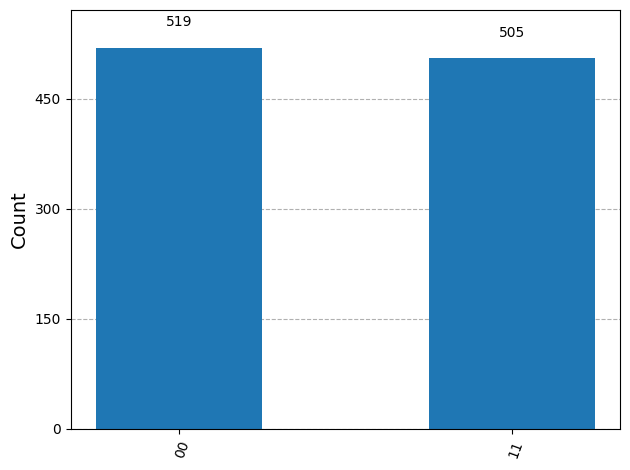

In [12]:
# Adjusted import
from qiskit_aer import AerSimulator  # Assuming you'll need this for a quantum instance

from qiskit_nature.drivers import UnitsType, Molecule
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit_nature.algorithms.optimizers import VQEUCCFactory
from qiskit.algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal


ModuleNotFoundError: No module named 'qiskit_nature.drivers'